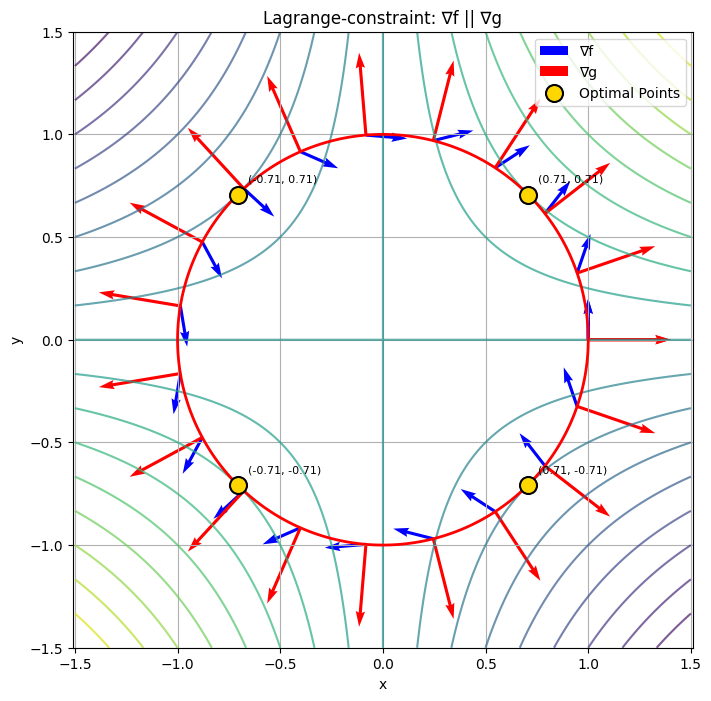

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definer funksjonene
f = lambda x, y: x * y + 1
g = lambda x, y: x**2 + y**2 - 1

# Generer datasett
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x, y)

# Beregn funksjonsverdier
Z_f = f(X, Y)
Z_g = g(X, Y)




# Plot konturlinjer
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z_f, levels=20, cmap='viridis', alpha=0.7)
plt.contour(X, Y, Z_g, levels=[0], colors='red', linewidths=2)  # Constraint-sirkel

# Gradientberegninger
theta = np.linspace(0, 2*np.pi, 20)
x_c, y_c = np.cos(theta), np.sin(theta)  # Punkter på enhetssirkelen

# Calculate solution points
sol_points = np.array([
    [1/np.sqrt(2), 1/np.sqrt(2)],
    [-1/np.sqrt(2), 1/np.sqrt(2)],
    [1/np.sqrt(2), -1/np.sqrt(2)],
    [-1/np.sqrt(2), -1/np.sqrt(2)]
])
sol_z = f(sol_points[:,0], sol_points[:,1])

# Gradientvektorer for f (blå) og g (rød)
plt.quiver(x_c, y_c, y_c, x_c, color='blue', scale=15, width=0.005, label='∇f')
plt.quiver(x_c, y_c, 2*x_c, 2*y_c, color='red', scale=15, width=0.005, label='∇g')
# Add solution points to contour plot
plt.scatter(sol_points[:,0], sol_points[:,1],
            color='gold', s=150, edgecolor='black',
            linewidth=1.5, zorder=3, marker='o',
            label='Optimal Points')

# Add coordinate annotations (optional)
for i, (x, y) in enumerate(sol_points):
    plt.text(x + 0.05, y + 0.05, 
             f'({x:.2f}, {y:.2f})', 
             fontsize=8, ha='left', va='bottom')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange-constraint: ∇f || ∇g')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\STSI\AppData\Local\Temp\ipykernel_29484\2385480214.py:28: UserWarning: The following kwargs were not used by contour: 'aplha'
  ax.contour(X, Y, Z_f, levels=15,aplha=0.2, cmap='viridis',


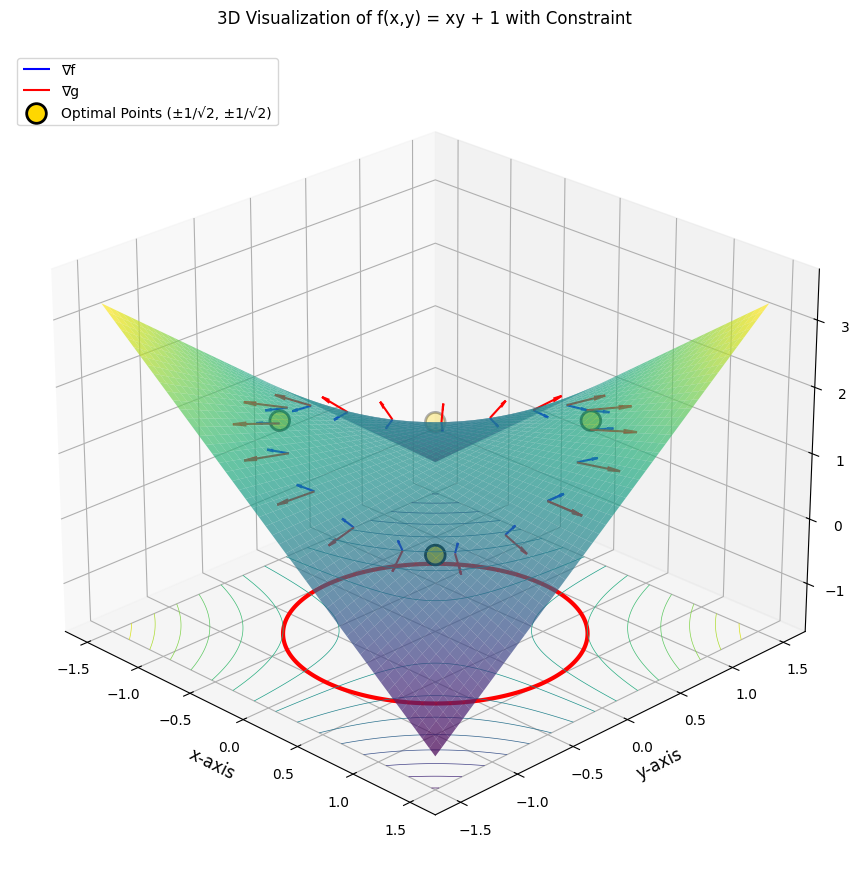

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define functions
f = lambda x, y: x * y + 1
g = lambda x, y: x**2 + y**2 - 1

# Generate data grid
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x, y)
Z_f = f(X, Y)
Z_g = g(X, Y)

# Create 3D plot setup
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the function surface
surf = ax.plot_surface(X, Y, Z_f, cmap='viridis', alpha=0.7)

# Add constraint contour on z-min level
ax.contour(X, Y, Z_g, levels=[0], colors='red', linewidths=3, 
          offset=np.min(Z_f)-0.5, zorder=2)

# Create projected contours of f
ax.contour(X, Y, Z_f, levels=15,aplha=0.2, cmap='viridis', 
          offset=np.min(Z_f)-0.5, linewidths=0.5)

# Calculate gradient vectors on constraint circle
theta = np.linspace(0, 2*np.pi, 20)
x_points = np.cos(theta)
y_points = np.sin(theta)
# Calculate solution points
sol_points = np.array([
    [1/np.sqrt(2), 1/np.sqrt(2)],
    [-1/np.sqrt(2), 1/np.sqrt(2)],
    [1/np.sqrt(2), -1/np.sqrt(2)],
    [-1/np.sqrt(2), -1/np.sqrt(2)]
])
sol_z = f(sol_points[:,0], sol_points[:,1])


# Plot gradient vectors (f in blue, g in red)
scale_factor = 0.15
ax.quiver(x_points, y_points, f(x_points,y_points),
         [y*scale_factor for y in y_points],  # df/dx = y
         [x*scale_factor for x in x_points],  # df/dy = x
         np.zeros_like(x_points),
         color='blue', label='∇f', lw=1.5)

ax.quiver(x_points, y_points, f(x_points,y_points),
         [2*x*scale_factor for x in x_points],  # dg/dx = 2x
         [2*y*scale_factor for y in y_points],  # dg/dy = 2y
         np.zeros_like(x_points),
         color='red', label='∇g', lw=1.5)
# Add to 3D plot
ax.scatter(sol_points[:,0], sol_points[:,1], sol_z,
           color='gold', s=200, edgecolor='black',
           linewidth=2, zorder=4, marker='o',
           label='Optimal Points (±1/√2, ±1/√2)')
# Configure plot appearance
ax.set_xlabel('x-axis', fontsize=12)
ax.set_ylabel('y-axis', fontsize=12)
ax.set_zlabel('f(x,y)', fontsize=12)
ax.set_title('3D Visualization of f(x,y) = xy + 1 with Constraint', pad=20)
ax.legend(loc='upper left')
ax.set_zlim(np.min(Z_f)-0.5, np.max(Z_f)+0.5)
ax.view_init(elev=25, azim=-45)

plt.tight_layout()
plt.show()


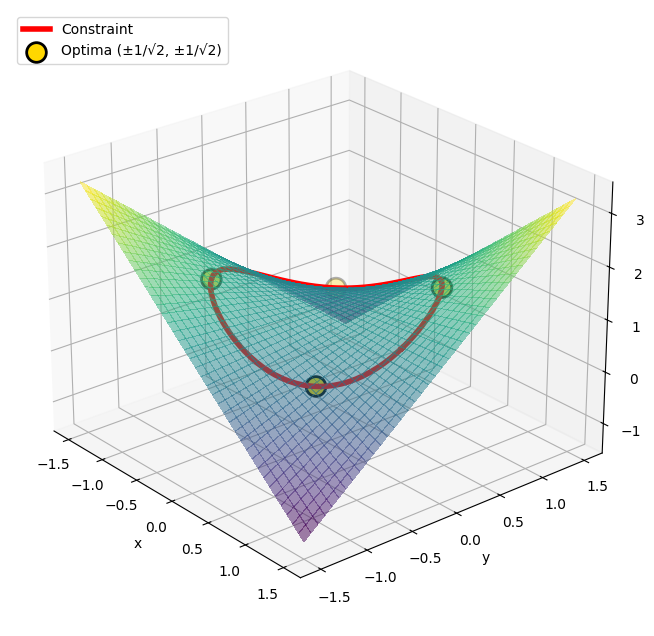

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definer funksjoner
f = lambda x, y: x * y + 1
g = lambda x, y: x**2 + y**2 - 1

# Generer data
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 3D-plott
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Tegn overflaten med justert transparens og zorder
surf = ax.plot_surface(X, Y, Z, cmap='viridis', 
                      alpha=0.5,          # Mer gjennomsiktig
                      antialiased=False, 
                      zorder=1,           # Lav prioritet
                      rstride=10,         # Reduser tetthet
                      cstride=10,
                      edgecolor='none')   # Fjern kantlinjer

# Constraint-kurve på overflaten (høy zorder)
theta = np.linspace(0, 2*np.pi, 100)
x_c, y_c = np.cos(theta), np.sin(theta)
ax.plot(x_c, y_c, f(x_c, y_c), 
       color='red', linewidth=4, 
       zorder=3, label='Constraint')

# Optimumpunkter med høyest zorder
sq2 = 1/np.sqrt(2)
sol_points = np.array([[sq2, sq2], [-sq2, sq2], 
                      [sq2, -sq2], [-sq2, -sq2]])
ax.scatter(sol_points[:,0], sol_points[:,1], f(sol_points[:,0], sol_points[:,1]),
          color='gold', s=200, edgecolor='black',
          linewidth=2, zorder=4, marker='o',
          label='Optima (±1/√2, ±1/√2)')

# Juster kameraets posisjon
ax.view_init(elev=25, azim=-40)  # Bedre vinkel for synlighet

# Legg til labels og legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend(loc='upper left')

plt.show()
